In [16]:
#Importing all the external packages we need throughout the project
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,interactive
from scipy.interpolate import CubicSpline
%matplotlib inline

In [17]:
#========
# Part 1 
#========

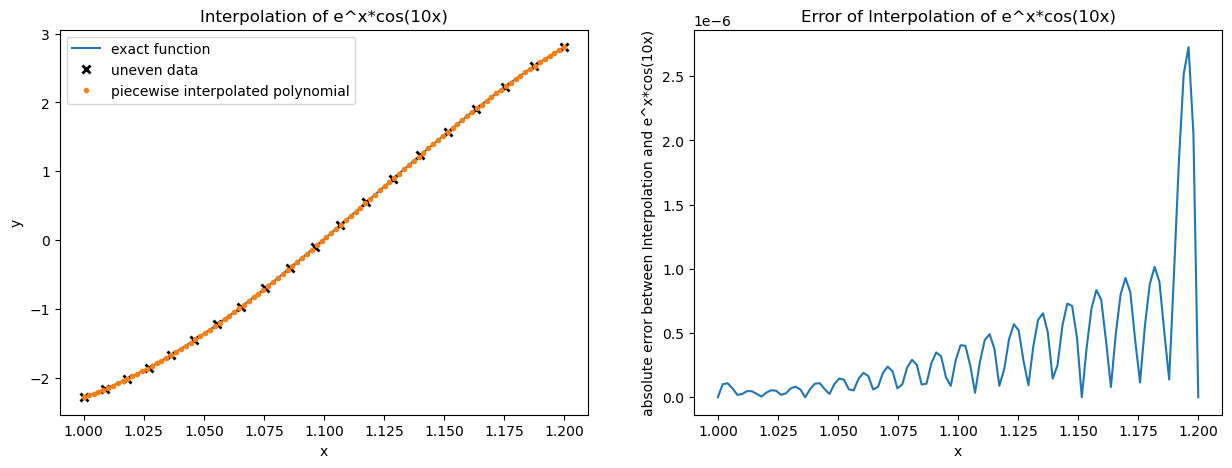

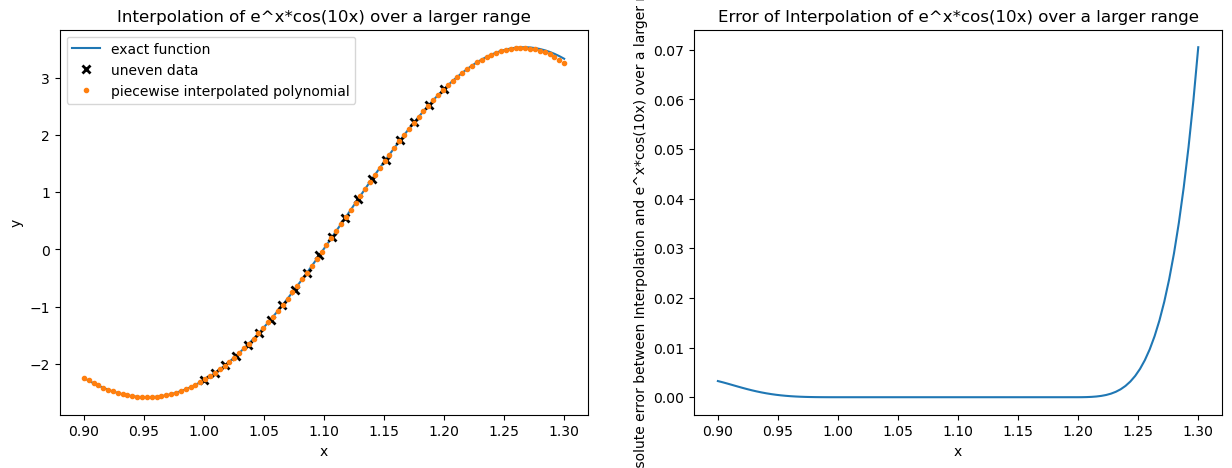

In [18]:
def f(x): # define f(x) as a callable python function
    return np.exp(x)*np.cos(10*x) # returns our function 

def pieceInt(deg,xk,yk,xj): #defining a callable function that performs piecewise Lagrangian interpolation                                                     
    numPolyPoints = deg+1 # finds and stores the number of coefficients we have to calculate
    numKnots = len(xk) # finds and stores the number of knots
    numInt = numKnots-deg # finds and stores the number of interpolants needed for the degree
    numEval = len(xj) # finds and stores the number of evaluation points
     
    a = np.zeros((deg+1,numInt))                   
    for i in range(numInt): # This loop gives us an array with the coefficients of each interpolant
        A = np.vander(xk[i:i+numPolyPoints]) # calculates the vandermode matrix for each interpolant           
        a[:,i] = np.linalg.solve(A,yk[i:i+numPolyPoints]) # solves the system to get the coefficients

    xjt = np.reshape(xj,(1,numEval)) # reshaping arrays of evaluation points and knots for mask broadcasting
    xkt = np.reshape(xk,(numKnots,1)) 
    
    ij = ((xjt<xkt[1:]) & (xjt>=xkt[:-1])) | ((xkt[1:]==xjt) & (xjt>xkt[:-1]).all(axis=0)) #returns True for the right interval between the knots
    ij[-1,:] = ((xjt>xkt).all(axis=0)| ij[-1,:])
    ij[0,:] = ((xjt<xkt).all(axis=0)| ij[0,:]) # creates Boolean mask which gives True for the interval that each evaluation point is in 

    c = np.reshape(np.arange(numKnots-1), (numKnots-1,1)) # creates a 'vertical' of the indexes of each interval
    d = np.reshape(np.zeros(numEval), (1, numEval)) # creates a 'horizontal' array of 0's, the length of the number of evaluation points
    e = c+d # broadcasting to create an array with rows representing the interval number, and columns for each evaluation point
    k = e[ij] # broadcasting with mask giving an array which contains the index of the interval of each evalutation point is in
    
    yj = np.zeros_like(k)
    pwr = deg-np.arange(numPolyPoints) # creates an array with powers in descending orders
    for i in range(len(k)):
        j = int(k[i] - deg//2) # j gives the index of the interpolant to use for each interval 
        j = max(0,j) # ensuring j is not less that 0
        j = min(j,numInt-1) # ensuring j is not more that the number of interpolants
        yj[i] = np.sum(a[:,j]*xj[i]**pwr) # finding y values of interpolant, using j to retrieve the coefficients of the interpolant for each evaluation point and broadcasting with the powers.
    return yj
    
def graphInt(xk,xj,func,D,name): # this function returns graphs of the interpolant and error, inputs are: the knots; the evaluation points; the function; Degree; the functions description.
    fig, ax = plt.subplots(1, 2,figsize = (15,5))
    ax[0].plot(xj,func(xj),label='exact function') # plots the exact function
    ax[0].plot(xk,func(xk),'kx',mew=2,label='uneven data') # plots the knots
    ax[0].plot(xj,pieceInt(D,xk,func(xk),xj),'.',label='piecewise interpolated polynomial') # plots the piecewise interpolated polynomial
    ax[0].set_xlabel('x') # labelling the axes
    ax[0].set_ylabel('y')
    ax[0].set_title('Interpolation of '+str(name)) # title of graphs
    ax[0].legend()
    ax[1].plot(xj,abs(func(xj)-pieceInt(D,xk,func(xk),xj)),label='error') # plots the error in different axes
    ax[1].set_xlabel('x')# labelling the axes
    ax[1].set_ylabel('absolute error between Interpolation and '+str(name)) 
    ax[1].set_title('Error of Interpolation of '+str(name))
    plt.show(); # returns the plots
    
N = 20
r0 = np.linspace(0,1/6,N) # arranging points that we use to make our knots
x1 = 1/(1-r0) # making our knots
y1 = f(x1) 
xp1=np.linspace(1.0,1.2,100) # arranging points for plotting

graphInt(x1,xp1,f,4,'e^x*cos(10x)')  # graph for f(x) 

xp2=np.linspace(0.9,1.3,100) # arranging points for plotting on larger range

graphInt(x1,xp2,f,4,'e^x*cos(10x) over a larger range')  # graph for f(x) with larger range

In [19]:
#========
# Part 2
#========

In [20]:
#define function for polynomial interpolation depending on degree of interpolation 'n'

def intdeg(n):
    
    x3=np.linspace(1,2,11)     #genreate 11 evenly spaced knots across the interval [1,2]
    l=len(x3)
    mid = l//2  #evaluate mid-point where our interpolant will be centered on as n increases
    xc=np.zeros_like(x3) #create a zeros array in which we re-order knots as 'center out'

    xc[0]=x3[mid] #start at midpoint
    xc[-1]=x3[0]  #end at first knot

    xc[1:-1:2] = x3[mid + 1:]  #assigns the odd incdices of the 'center out' array the x3 values after midpoint
    xc[2:-1:2] = x3[mid - 1:0:-1] #assigns the even indices of the 'center out' array the x3 values before midpoint
                                  #(excluding end point)

    xc=xc[:n+1]              #shortens the centers array so we interpolate over the correct amount of points for degree n

    yc = f(xc)             #corresponding correctly ordered y data values
    x=np.linspace(1,2,100)
    A=np.vander(xc)
    a=np.linalg.solve(A,yc)
    pows = (n-np.arange(n+1)).reshape(n+1,1)
    xnew = np.reshape(x,(1,100))
    ynew = np.reshape(np.array(np.sum((xnew**pows)*a.reshape(n+1,1),axis=0)),(1,100))

    
    plt.plot(xnew[0,:],ynew[0,:],'.',label='Interpolant for e^(x)*cos(10x)')
    plt.plot(x,f(x),label='e^(x)*cos(10x)')
    plt.plot(xc,yc,'kx',mew=2,label='data')
    plt.ylim([-10,10])
    plt.legend(loc='upper left')
    plt.ylim([-10,10])
    plt.xlabel('x')
    plt.ylabel('y')
interact(intdeg, n=(1,10))


interactive(children=(IntSlider(value=5, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.intdeg(n)>

In [21]:
#========
# Part 3
#========

There seems to be  8  points missing. These are:
2.4, 10.1, 10.2, 10.3, 10.4, 14.1, 14.2, 14.3


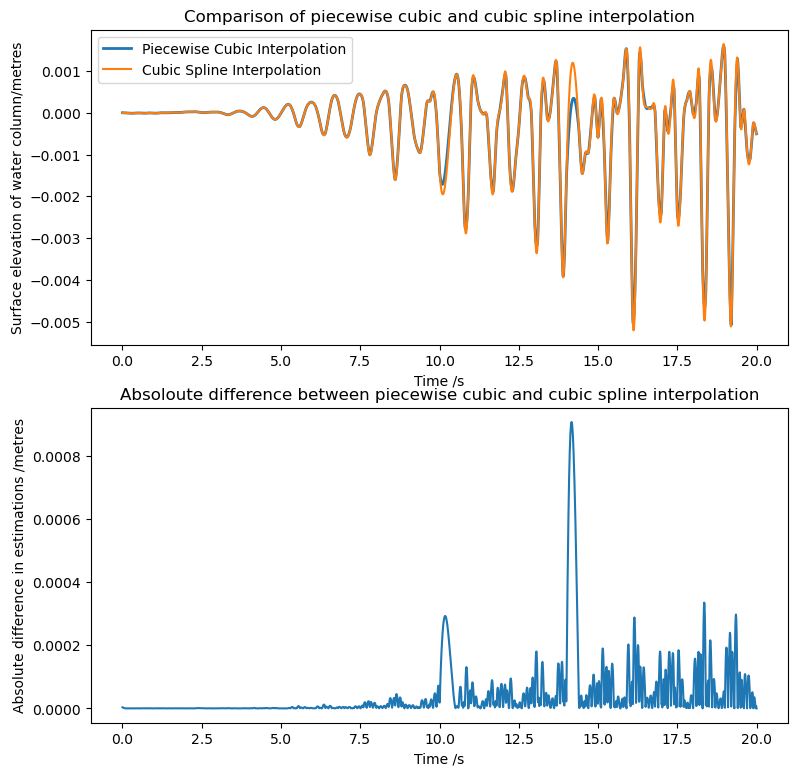

In [30]:
wavedata = np.loadtxt("wave_data1.txt") #import the data
indexes = np.array((wavedata[0].round(1)).astype(np.float64)) #take the array of indexes and round to be able to compare

perfect = np.arange(0.1,30.1,0.1,dtype=np.float64).round(1) #create an array with all the indexes we would expect

noMissing = len(perfect)-len(indexes) #the number of missing points

missingPoints = np.setdiff1d(perfect,indexes) #the set of missing points

print("There seems to be ",noMissing," points missing. These are:")
print(', '.join(map(str,missingPoints))) #print the array without brackets for nice formatting

xNew = np.linspace(0,20,int(20/0.01)) #set our evaluation points

yNew = pieceInt(3,wavedata[0],wavedata[1],xNew) #calculate our piecewise points
ySpline = (CubicSpline(wavedata[0],wavedata[1]))(xNew) #calculate out cubic spline points
diff = abs(yNew-ySpline) #find the difference in our data sets

fig, (ax1,ax2) = plt.subplots(2, figsize=(9,9))

ax1.plot(xNew,yNew,label = "Piecewise Cubic Interpolation", linewidth = 2) #set linewidth as otherwise line is mostly not visible
ax1.plot(xNew,ySpline,label = "Cubic Spline Interpolation")
ax1.set_xlabel("Time /s")
ax1.set_ylabel("Surface elevation of water column/metres")
ax1.legend()
ax1.set_title("Comparison of piecewise cubic and cubic spline interpolation");

ax2.plot(xNew,diff,label = "Difference in interpolation plots")
ax2.set_xlabel("Time /s")
ax2.set_ylabel("Absolute difference in estimations /metres")
ax2.set_title("Absoloute difference between piecewise cubic and cubic spline interpolation");

In [29]:
#first finding the needed indexes in xNew
import pandas as pd

missingIndexes = (missingPoints *100).astype(int) #get the indexes of our missing points in xNew

pwMissing = np.array(yNew[missingIndexes]) #Find the missing values using piecewise cubic
splineMissing = np.array(ySpline[missingIndexes]) #Find the missing values using cubic spline

table=np.array([missingPoints,pwMissing,splineMissing,abs(pwMissing-splineMissing)]) #set the columns we need for our table

#set the table as a data frome
print("According to our different interpolation techniques, the values of our missing points should be:\n")
df1 = pd.DataFrame(table.transpose(),columns=['Time','Water Elevation- Piecewise Cubic','Water Elevation- Spline Cubic','Difference in Estimation'])


#this is styling for printing the data frame, we set border and font colours and a caption)
df1.style.hide(axis='index').set_properties(**{'border': '2.0px solid black', 'color': 'darkslategray'}).background_gradient(
    subset='Difference in Estimation',cmap='YlOrRd').set_caption(
    "Expected Values of Missing Points").set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '15px')
    ]
}])

According to our different interpolation techniques, the values of our missing points should be:



Time,Water Elevation- Piecewise Cubic,Water Elevation- Spline Cubic,Difference in Estimation
2.400000,0.000019,0.000020,0.000001
10.100000,-0.001700,-0.001951,0.000251
10.200000,-0.001325,-0.001616,0.000291
10.300000,-0.000454,-0.000660,0.000206
10.400000,0.000371,0.000288,0.000083
14.100000,-0.000160,0.000653,0.000812
14.200000,0.000337,0.001200,0.000863
14.300000,0.000171,0.000664,0.000493
